<a href="https://colab.research.google.com/github/Rabia-Akhtr/Data-Science-Project-Breast_Cancer_Classification_ML/blob/main/Data_Science_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Title:   Evaluating the Performance of Different Machine Learning Models for Breast Cancer Diagnosis**

# **Import Libraries**
Load the required libraries for data manipulation, preprocessing, visualization and modeling.

In [15]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import plotly.express as px

# **Load and Explore the Dataset**
We will use the Breast Cancer Dataset (UCI Machine Learning Repository).

**Dataset Overview**

The dataset contains features computed from digitized images of fine needle aspirate (FNA) tests on breast masses.

**Key Features:**
Attributes like clump thickness, uniformity of cell size/shape, mitoses, etc.

**Dataset size:** 699 samples, with some missing values in the attribute "Bare Nuclei."

**Columns:**
Sample code number (ID, not useful)

Clump Thickness, Uniformity of Cell Size, ..., Bland Chromatin, etc. (features)

**Target Variable:**
Class (2 = benign, 4 = malignant).

In [18]:
def load_and_preprocess_data(url):
    """
    Loads and lightly cleans the Breast Cancer Wisconsin dataset.

    Steps:
    - Assigns proper column names
    - Replaces '?' with NaN
    - Converts 'Bare_Nuclei' to numeric
    - Drops 'ID' column
    - Displays summary info for EDA preparation

    Parameters:
        url (str): URL of the dataset

    Returns:
        pd.DataFrame: Cleaned dataset ready for EDA
    """
    # Column names from UCI repository
    column_names = [
        'ID', 'Clump_Thickness', 'Uniformity_Cell_Size', 'Uniformity_Cell_Shape',
        'Marginal_Adhesion', 'Single_Epithelial_Cell_Size', 'Bare_Nuclei',
        'Bland_Chromatin', 'Normal_Nucleoli', 'Mitoses', 'Class'
    ]

    # Load the dataset
    data = pd.read_csv(url, names=column_names, header=None)
    display(data)

    # Replace '?' with NaN in the entire DataFrame before converting to numeric ***
    data.replace('?', np.nan, inplace=True)

    # Convert 'Bare_Nuclei' to numeric (now possible due to '?'=>NaN)
    data['Bare_Nuclei'] = pd.to_numeric(data['Bare_Nuclei'], errors='coerce')

    # Drop the 'ID' column (not useful for prediction)
    data.drop(columns='ID', inplace=True)

    # Check for missing values and data types
    print("\nDataset Info:")
    print(data.info())

    return data

# URL of the dataset (UCI Breast Cancer Wisconsin Dataset)
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data"

# Call the function
data = load_and_preprocess_data(url)


,ID,Clump_Thickness,Uniformity_Cell_Size,Uniformity_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2,1,1,1,2
695,841769,2,1,1,1,2,1,1,1,1,2
696,888820,5,10,10,3,7,3,8,10,2,4
697,897471,4,8,6,4,3,4,10,6,1,4



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Clump_Thickness              699 non-null    int64  
 1   Uniformity_Cell_Size         699 non-null    int64  
 2   Uniformity_Cell_Shape        699 non-null    int64  
 3   Marginal_Adhesion            699 non-null    int64  
 4   Single_Epithelial_Cell_Size  699 non-null    int64  
 5   Bare_Nuclei                  683 non-null    float64
 6   Bland_Chromatin              699 non-null    int64  
 7   Normal_Nucleoli              699 non-null    int64  
 8   Mitoses                      699 non-null    int64  
 9   Class                        699 non-null    int64  
dtypes: float64(1), int64(9)
memory usage: 54.7 KB
None


In [2]:
def load_and_preprocess_data(url):
    """
    Function to load and Displays the first few rows, data types, missing values, and summary statistics.

    Parameters:
        url (str): URL of the dataset.

    Returns:
        pd.DataFrame: Loaded dataset as a pandas DataFrame.
    """
    # Column names for the dataset
    column_names = [
        'ID', 'Clump_Thickness', 'Uniformity_Cell_Size', 'Uniformity_Cell_Shape',
        'Marginal_Adhesion', 'Single_Epithelial_Cell_Size', 'Bare_Nuclei',
        'Bland_Chromatin', 'Normal_Nucleoli', 'Mitoses', 'Class'
    ]

    # Load the dataset
    data = pd.read_csv(url, names=column_names, header=None)
    display(data)

    # *** Replace '?' with NaN in the entire DataFrame before converting to numeric ***
    data = data.replace('?', np.nan)

    # Check for missing values and data types
    print("\nDataset Info:")
    print(data.info())

    return data

# URL of the dataset (UCI Breast Cancer Wisconsin Dataset)
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data"

# Call the function
data = load_and_preprocess_data(url)

,ID,Clump_Thickness,Uniformity_Cell_Size,Uniformity_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2,1,1,1,2
695,841769,2,1,1,1,2,1,1,1,1,2
696,888820,5,10,10,3,7,3,8,10,2,4
697,897471,4,8,6,4,3,4,10,6,1,4



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   ID                           699 non-null    int64 
 1   Clump_Thickness              699 non-null    int64 
 2   Uniformity_Cell_Size         699 non-null    int64 
 3   Uniformity_Cell_Shape        699 non-null    int64 
 4   Marginal_Adhesion            699 non-null    int64 
 5   Single_Epithelial_Cell_Size  699 non-null    int64 
 6   Bare_Nuclei                  683 non-null    object
 7   Bland_Chromatin              699 non-null    int64 
 8   Normal_Nucleoli              699 non-null    int64 
 9   Mitoses                      699 non-null    int64 
 10  Class                        699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB
None


In [19]:
# Number of rows to peek
n = 5

# Display the first n rows
print(f"First {n} rows:")
print(data.head(n), "\n")

# Display the last n rows
print(f"Last {n} rows:")
print(data.tail(n), "\n")

# Display the shape of the DataFrame
rows, cols = data.shape
print(f"Shape: {rows} rows, {cols} columns")

First 5 rows:
   Clump_Thickness  Uniformity_Cell_Size  Uniformity_Cell_Shape  \
0                5                     1                      1   
1                5                     4                      4   
2                3                     1                      1   
3                6                     8                      8   
4                4                     1                      1   

   Marginal_Adhesion  Single_Epithelial_Cell_Size  Bare_Nuclei  \
0                  1                            2          1.0   
1                  5                            7         10.0   
2                  1                            2          2.0   
3                  1                            3          4.0   
4                  3                            2          1.0   

   Bland_Chromatin  Normal_Nucleoli  Mitoses  Class  
0                3                1        1      2  
1                3                2        1      2  
2                3      

### **Missing‑value check**

In [20]:
print("Missing values per column:\n", data.isnull().sum())

Missing values per column:
 Clump_Thickness                 0
Uniformity_Cell_Size            0
Uniformity_Cell_Shape           0
Marginal_Adhesion               0
Single_Epithelial_Cell_Size     0
Bare_Nuclei                    16
Bland_Chromatin                 0
Normal_Nucleoli                 0
Mitoses                         0
Class                           0
dtype: int64


In [23]:
data.describe()

,Clump_Thickness,Uniformity_Cell_Size,Uniformity_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
count,699.000000,699.000000,699.000000,699.000000,699.000000,683.000000,699.000000,699.000000,699.000000,699.000000
mean,4.417740,3.134478,3.207439,2.806867,3.216023,3.544656,3.437768,2.866953,1.589413,2.689557
std,2.815741,3.051459,2.971913,2.855379,2.214300,3.643857,2.438364,3.053634,1.715078,0.951273
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,6.000000,5.000000,4.000000,1.000000,4.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


# **Exploratory Data Analysis (EDA)**

## **Visualize Class Distribution**
This step visualizes the class distribution (Benign vs Malignant) to ensure the dataset is balanced.


Class Distribution:
Class
2    458
4    241
Name: count, dtype: int64


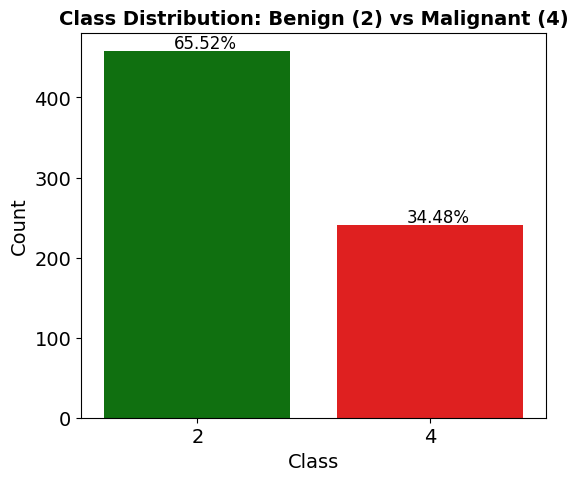

In [24]:
def visualize_class_distribution(data, target_column):
    """
    Visualize the class distribution for the target variable.
    """
    print("\nClass Distribution:")
    print(data[target_column].value_counts())

    colors = {2: "green", 4: "red"}

    # Create count plot
    plt.figure(figsize=(6, 5))

    ax = sns.countplot(x=target_column, hue=target_column, data=data, palette=colors, legend=False)

    # Add percentages on bars
    total = len(data)
    for p in ax.patches:
        percentage = f"{100 * p.get_height() / total:.2f}%"
        ax.annotate(percentage, (p.get_x() + 0.3, p.get_height() + 3), fontsize=12)

    # Titles and labels
    plt.title("Class Distribution: Benign (2) vs Malignant (4)", fontsize=14, fontweight="bold") #Update title to reflect class values
    plt.xlabel("Class", fontsize=14)
    plt.ylabel("Count", fontsize=14)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)

    # Show plot
    plt.show()

# Call function
visualize_class_distribution(data, 'Class')

## **Pie Plot**

In [25]:
def create_pie_chart(data):
    """
    Creates and displays a pie chart showing the percentage of Benign and Malignant cases,
    with the legend inside the chart displaying counts and percentages.

    Args:
        data (pd.DataFrame): The input DataFrame containing the 'Class' column, where
                             '0' represents Benign and '1' represents Malignant cases.

    Returns:
        None. Displays the pie chart.
    """
    # Count occurrences of each class
    class_counts = data['Class'].value_counts().reset_index()
    class_counts.columns = ['Class', 'Count']

    # Calculate percentages
    total_count = class_counts['Count'].sum()
    class_counts['Percentage'] = (class_counts['Count'] / total_count) * 100

    # Create custom labels with counts and percentages
    class_mapping = {0: "Benign", 1: "Malignant"}
    class_counts['Label'] = class_counts.apply(
        lambda row: f"{class_mapping[row['Class']]}<br>({row['Count']} - {row['Percentage']:.1f}%)",
        axis=1
    )

    # Dynamically assign colors
    color_map = {"Benign": "skyblue", "Malignant": "red"}

    # Create a pie chart using Plotly Express
    fig = px.pie(
        class_counts,
        names='Label',  # Use custom labels for pie slices
        values='Count',  # Size of slices based on counts
        title="Percentage of Benign and Malignant Cases",  # Chart title
        color=class_counts["Class"].map(class_mapping),  # Map class values to readable names
        color_discrete_map=color_map  # Assign colors dynamically
    )

    # Adjust layout for better clarity & move the legend inside the chart
    fig.update_layout(
        margin=dict(t=50, l=25, r=25, b=25),  # Adjust margins
        showlegend=True,  # Ensure legend is shown
        legend=dict(
            x=0.5, y=0.5,  # Center inside the chart
            xanchor='center', yanchor='middle',
            traceorder='normal',
            font=dict(size=12),
            bgcolor='rgba(255, 255, 255, 0.6)',  # Transparent white background
            borderwidth=1  # Border for better contrast
        )
    )

    # Display the chart
    fig.show()

# Example Usage
if __name__ == "__main__":
    example_data = pd.DataFrame({
        'Class': [0] * 458 + [1] * 241  # 458 Benign cases, 241 Malignant cases
    })

    # Call function
    create_pie_chart(example_data)


In [26]:
def plot_correlation_heatmap(data, method='kendall', annot=True, figsize=(10, 8), cmap='coolwarm'):
    """
    Plots a correlation heatmap for all numerical features in the dataset.

    Parameters:
        data (pd.DataFrame): The dataset containing numerical features.
        method (str): Correlation method - 'pearson', 'kendall', or 'spearman'.
        annot (bool): Whether to annotate each cell with the correlation coefficient.
        figsize (tuple): Size of the heatmap figure.
        cmap (str): Color map to use.

    Returns:
        None
    """
    numeric_data = data.select_dtypes(include='number')
    corr_matrix = numeric_data.corr(method=method)

    plt.figure(figsize=figsize)
    sns.heatmap(corr_matrix, annot=annot, fmt=".2f", cmap=cmap, square=True)
    plt.title(f"{method.capitalize()} Correlation Heatmap", fontsize=14)
    plt.xticks(rotation=45)
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()


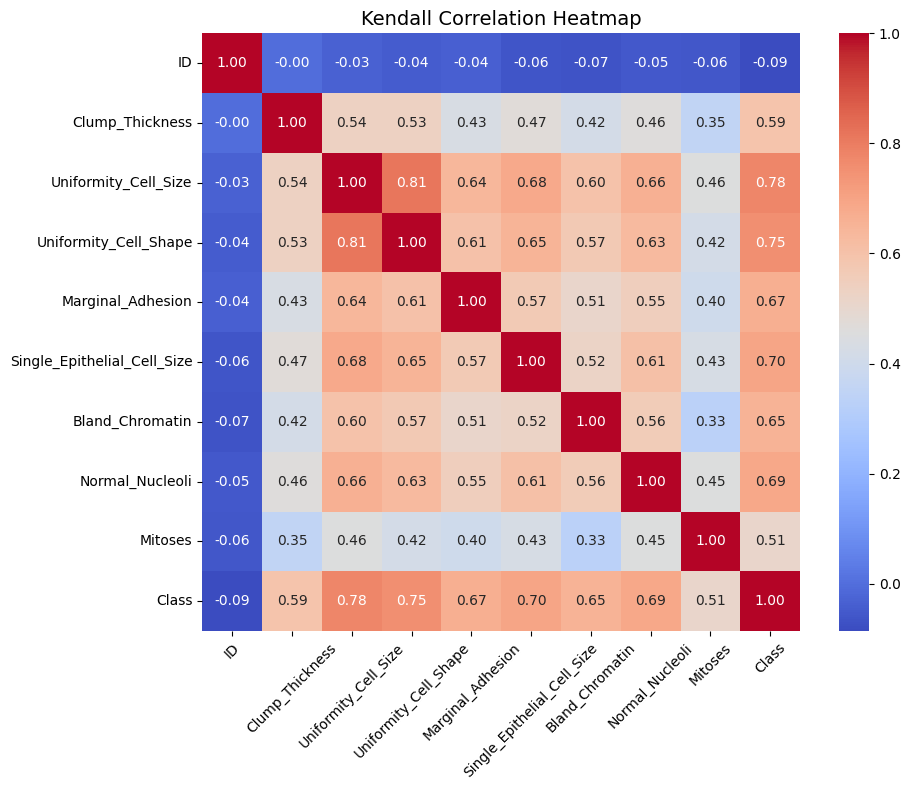

In [8]:
plot_correlation_heatmap(data)

### **Data Preprocessing**
Preprocessing ensures data is clean and ready for modeling. Steps include:
1. Dropping unnecessary columns (e.g., 'ID').
2. Handling missing values in the 'Bare_Nuclei' column using median imputation.
3. Encoding the target variable ('Class') as binary (0 = benign, 1 = malignant).
4. Scaling features to standardize input.

In [27]:
def preprocess_data(data):
    """
    Preprocess the dataset:
    - Drops unnecessary columns like 'ID'.
    - Handles missing values in 'Bare_Nuclei'.
    - Converts 'Class' to binary format (2 -> 0, 4 -> 1).
    - Splits data into training and testing sets.
    - Normalizes features using StandardScaler.

    Args:
        data (pd.DataFrame): Loaded dataset.

    Returns:
        X_train_scaled, X_test_scaled, y_train, y_test: Preprocessed data.
    """

    # Drop the 'ID' column if it exists
    if 'ID' in data.columns:
        data = data.drop(columns=['ID'])

    # Convert 'Bare_Nuclei' to numeric (replace '?' first)
    data['Bare_Nuclei'] = data['Bare_Nuclei'].replace('?', np.nan)
    data['Bare_Nuclei'] = pd.to_numeric(data['Bare_Nuclei'], errors='coerce')

    # Explicitly fill missing values with median & set type
    median_value = data['Bare_Nuclei'].median()
    data['Bare_Nuclei'] = data['Bare_Nuclei'].fillna(median_value).astype(float)

    # Check for missing values
    print("\nMissing values after handling:")
    print(data.isnull().sum())

    # Convert 'Class' to binary labels
    data['Class'] = data['Class'].replace({2: 0, 4: 1})

    # Split features and target
    X = data.drop(columns=['Class'])
    y = data['Class']

    # Split into train & test sets (80% training, 20% testing)
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )

    # Display shapes
    print("\nTraining Data Shape:", X_train.shape)
    print("Testing Data Shape:", X_test.shape)

    # Scale features using StandardScaler
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Display scaled data preview
    print("\nPreview of Scaled Features (Training Data):")
    print(pd.DataFrame(X_train_scaled).head())

    return X_train_scaled, X_test_scaled, y_train, y_test

# Example usage, assuming 'data' is already loaded as a DataFrame
X_train_scaled, X_test_scaled, y_train, y_test = preprocess_data(data)



Missing values after handling:
Clump_Thickness                0
Uniformity_Cell_Size           0
Uniformity_Cell_Shape          0
Marginal_Adhesion              0
Single_Epithelial_Cell_Size    0
Bare_Nuclei                    0
Bland_Chromatin                0
Normal_Nucleoli                0
Mitoses                        0
Class                          0
dtype: int64

Training Data Shape: (559, 9)
Testing Data Shape: (140, 9)

Preview of Scaled Features (Training Data):
          0         1         2         3         4         5         6  \
0  1.960783  2.210439  1.602175  2.471191  1.262160  0.405538  2.681578   
1 -1.224460 -0.696179 -0.749404 -0.628426 -0.551587 -0.418810 -1.004493   
2  0.191203 -0.696179 -0.749404 -0.628426 -0.551587 -0.418810 -0.185366   
3 -0.516629 -0.696179 -0.749404 -0.628426 -0.551587 -0.693593 -0.185366   
4  0.545119  2.210439  2.274055  2.471191  0.355287  1.779452  1.452888   

          7         8  
0  0.040888 -0.359831  
1 -0.612147 -0.359831

In [28]:
# Display preprocessing summary
print("\n\033[1mPreprocessing Summary\033[0m")  # Bold Text
print("====================================")
print("✔ Target variable encoded (4 → 1, 2 → 0).")
print("✔ Data split into training (80%) and test (20%) sets.")
print("✔ Data normalized using StandardScaler.")
print("------------------------------------")
print(f"Training Data Shape: {X_train_scaled.shape}")
print(f"Test Data Shape: {X_test_scaled.shape}")
print(f"Training Target Shape: {y_train.shape}")
print(f"Test Target Shape: {y_test.shape}")
print("------------------------------------")

# Training Data Class Distribution
train_counts = y_train.value_counts()
train_percentages = y_train.value_counts(normalize=True) * 100

print("\n\033[1mClass Distribution in Training Data:\033[0m")
for label, count in train_counts.items():
    print(f"Class {label}: {count} samples ({train_percentages[label]:.2f}%)")

# Test Data Class Distribution
test_counts = y_test.value_counts()
test_percentages = y_test.value_counts(normalize=True) * 100

print("\n\033[1mClass Distribution in Test Data:\033[0m")
for label, count in test_counts.items():
    print(f"Class {label}: {count} samples ({test_percentages[label]:.2f}%)")
print("====================================")



Preprocessing Summary
✔ Target variable encoded (4 → 1, 2 → 0).
✔ Data split into training (80%) and test (20%) sets.
✔ Data normalized using StandardScaler.
------------------------------------
Training Data Shape: (559, 9)
Test Data Shape: (140, 9)
Training Target Shape: (559,)
Test Target Shape: (140,)
------------------------------------

Class Distribution in Training Data:
Class 0: 366 samples (65.47%)
Class 1: 193 samples (34.53%)

Class Distribution in Test Data:
Class 0: 92 samples (65.71%)
Class 1: 48 samples (34.29%)


In [29]:
def major_statistics(data):
    """
    Function to compute major statistics including mean, median, standard deviation,
    skewness, and kurtosis for the given dataset.

    Parameters:
        data (pd.DataFrame): The input dataset.

    Returns:
        pd.DataFrame: A DataFrame containing the computed statistics.
    """

    # Compute statistics
    stats = pd.DataFrame({
        "Mean": data.mean(numeric_only=True),
        "Median": data.median(numeric_only=True),
        "Standard Deviation": data.std(numeric_only=True),
        "Skewness": data.skew(numeric_only=True),
        "Kurtosis": data.kurt(numeric_only=True)
    })

    # Print statistics
    print("\n\033[1mSummary Statistics:\033[0m")

    return stats

# Call the function
major_statistics(data)



Summary Statistics:


,Mean,Median,Standard Deviation,Skewness,Kurtosis
Clump_Thickness,4.417740,4.0,2.815741,0.592859,-0.623715
Uniformity_Cell_Size,3.134478,1.0,3.051459,1.233137,0.098803
Uniformity_Cell_Shape,3.207439,1.0,2.971913,1.161859,0.007011
Marginal_Adhesion,2.806867,1.0,2.855379,1.524468,0.987947
Single_Epithelial_Cell_Size,3.216023,2.0,2.214300,1.712172,2.169066
Bare_Nuclei,3.486409,1.0,3.621929,1.025347,-0.726467
Bland_Chromatin,3.437768,3.0,2.438364,1.099969,0.184621
Normal_Nucleoli,2.866953,1.0,3.053634,1.422261,0.474269
Mitoses,1.589413,1.0,1.715078,3.560658,12.657878
Class,0.344778,0.0,0.475636,0.654564,-1.576064
